In [51]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from os.path import join as pjoin
from sklearn.neural_network import MLPRegressor
import seaborn as sns

In [5]:
def convert_to_one_hot(a):
    b = np.zeros((a.size, a.max() + 1))
    b[np.arange(a.size), a] = 1
    return b

In [6]:
PBMC_DATA_DIR = "../../data/pancreas"

data_file = pjoin(PBMC_DATA_DIR, "pancreas_counts.h5ad")
adata = sc.read_h5ad(data_file)


cell_types_ints, cell_types = pd.factorize(np.array(adata.obs.cell_type.values))
X = convert_to_one_hot(cell_types_ints)

n_genes = None
if n_genes is not None:
    gene_idx = np.random.choice(np.arange(adata.shape[1]), replace=False, size=n_genes)
else:
    gene_idx = np.arange(adata.shape[1])

Y = adata.X[:, gene_idx]

In [8]:
latent_dims = [5, 5]
nn = MLPRegressor(hidden_layer_sizes=latent_dims, activation="relu", max_iter=100)
nn.fit(X, Y)
# grrr = GRRR(latent_dim=latent_dim)
# grrr.fit(X=X, Y=Y, use_vi=False, use_total_counts_as_size_factors=True, n_iters=15000)

# A_est = grrr.param_dict["A"].numpy()
# B_est = grrr.param_dict["B"].numpy()

# coeff_mat = pd.DataFrame(
#     A_est @ B_est, index=cell_types, columns=adata.var.index.values[gene_idx]
# )
# coeff_mat.to_csv("./out/coeff_matrix_grrr.csv")
# pd.DataFrame(A_est).to_csv("./out/A_grrr.csv")
# pd.DataFrame(B_est).to_csv("./out/B_grrr.csv")

/Users/andrewjones/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=[5, 5], max_iter=100)

In [44]:
def relu(x):
    return np.maximum(x, 0)

W1 = nn.coefs_[0]
W2 = nn.coefs_[1]
intercept1 = nn.intercepts_[0]
intercept2 = nn.intercepts_[1]

latent_vars = relu(X @ W1 + intercept1) @ W2 + intercept2

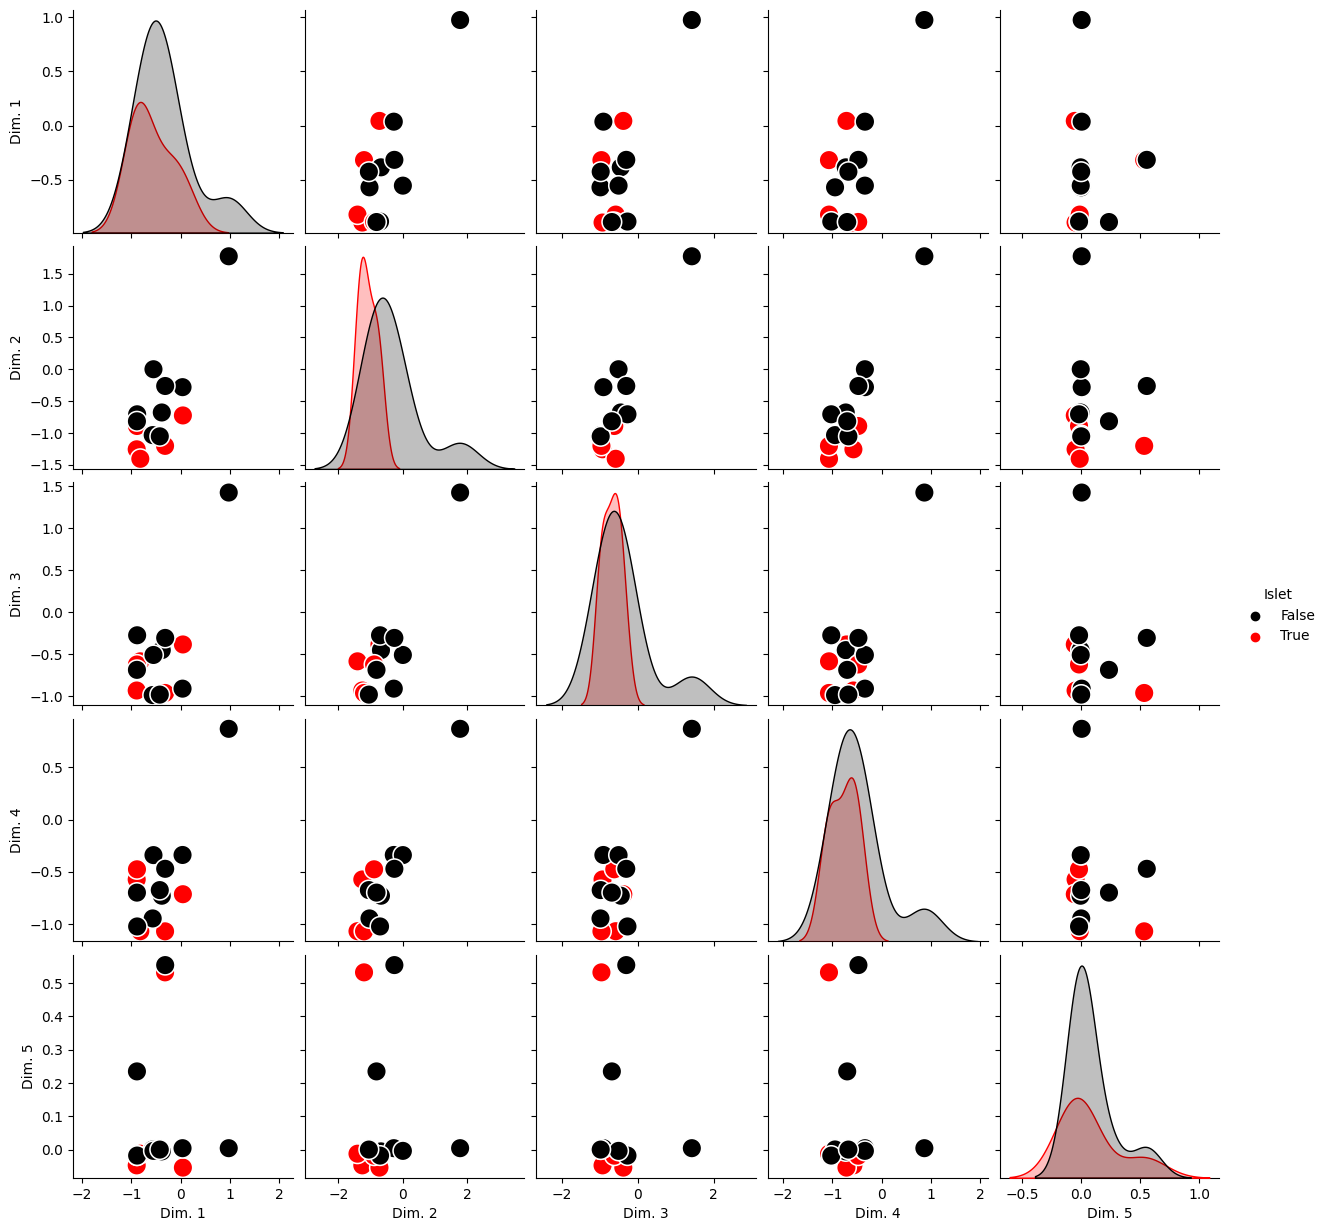

In [52]:
rank = latent_dims[0]
Z_df = pd.DataFrame(W1)
Z_df.columns = ["Dim. {}".format(xx) for xx in range(1, rank + 1)]
islets = ["alpha", "beta", "delta", "epsilon", "gamma"]

Z_df["Islet"] = [x in islets for x in cell_types]
sns.pairplot(
    data=Z_df, hue="Islet", palette=["black", "red"], plot_kws={"s": 200}
)  # , height=1.5)
# plt.tight_layout()
plt.savefig("./out/pairplot_nn.png")
plt.show()